<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Random Forest using Python (sklearn):</p><br>
<p style="font-family: Arial; font-size:2.25em;color:green; font-style:bold"><br>
Kumar Rahul</p><br>

### We will be using Earnings Manipulation data (fraud_data.csv) in this exercise. Refer the Exhibit 1 to understand the feature list. Use the data and answer the below questions.

> 1.	Load the dataset in Jupyter Notebook using pandas
2.	Build a correlation matrix between all the numeric features in the dataset. Report the features, which are correlated at a cut-off of 0.70. What actions will you take on the features, which are highly correlated?
3.	Create a new data frame with the numeric features and categorical features as dummy variable coded features. Which features will you include for model building and why?
4.	Split the data into training set and test set. Use 80% of data for model training and 20% for model testing. 
5.	Use sklearn package to build a random forest model using `Status` as a dependent variable and all other features as independent variable. Report the model performance on the test set.
6.	Use sklearn model selection module to fine-tune the model parameters of random forest model. Report the model performance on the test set.


**PS: Not all the questions are being answered as a part of the same notebook. You are encouraged to answer the questions if you find them missing.**

**Exhibit 1**


|Sl. No.|	Name of Variable|	Variable Description|
|--------|--------------|------------------|
|1	|Company ID	|Unique Identifier|
|2 |	DSRI	|Days’ Sales in Receivables Index (DSRI): A large increase in receivable days might suggest accelerated revenue recognition to inflate profits.|
|3	|GMI	|Gross Margin Index (GMI): A deteriorating gross margin sends a negative signal about a firm’s prospects and creates an incentive to inflate profits.|
|4	|AQI	 |Asset Quality Index (AQI): An increase in long term assets (for example, the capitalisation of costs), other than property plant and equipment, relative to total assets indicates that a firm has potentially increased its involvement in cost deferral to inflate profits.|
|5	|SGI	|Sales Growth Index (SGI): High sales growth does not imply manipulation but high growth companies are more likely to commit financial fraud because their financial position and capital needs put pressure on managers to achieve earnings targets. If growth firms face large stock prices losses at the first indication of a slowdown, they may have greater incentives to manipulate earnings.|
|6	|DEPI 	 |Depreciation (DEPI): A falling level of depreciation relative to net fixed assets raises the possibility that a firm has revised upwards the estimated useful life of assets, or adopted a new method that is income increasing.|
|7	|SGAI	|Sales, General and Administrative Expenses (SGAI): Analysts might interpret a disproportionate increase in SG&A relative to sales as a negative signal about a firm’s future prospects, thereby creating an inventive to inflate profits.|
|8	|ACCR	|Accruals to Total Assets (ACCR): Total accruals are calculated as the change in working capital (other than cash) less depreciation relative to total assets. Accruals, or a portion thereof, reflect the extent to which managers make discretionary accounting choices to alter earnings. A higher level of accruals is, therefore, associated with a higher likelihood of profit manipulation.|
|9	|LEVI	|Leverage Index (LEVI): Leverage is measured as total debt relative to total assets. An increase in leverage creates an incentive to manipulate profits in order to meet debt covenants.|
|10|	Status	|Manipulator – Yes, Non Manipulator – No|

***

Learn more about random forest: https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#intro

# Code starts here

To know the environment with the pyhton kernal



In [1]:
import sys, os

sys.executable

'/Users/Rahul/anaconda3/bin/python'

Supress the warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

We are going to use below mentioned libraries for **data import, processing and visulization**. As we progress, we will use other specific libraries for model building and evaluation. 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt

#the output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline 


## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_



modify the ast_note_interactivity kernel option to see the value of multiple statements at once.

In [4]:
import os

os.getcwd()

#os.chdir()

'/Users/Rahul/Documents/Rahul Office/IIMB/Work @ IIMB/Training Material/Concepts/Python/Python_ensemble/Fixed code'

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
raw_df = pd.read_csv( "../Earnings_Manipulation_case/data/fraud_data.csv", 
                        sep = ',', na_values = ['', ' '])

raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.head()

,company_id,dsri,gmi,aqi,sgi,depi,sgai,accr,levi,status
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes


Dropping company_id as these will not be used for any analysis or model building.

In [7]:
#?raw_df.drop()

In [8]:
if set(['company_id']).issubset(raw_df.columns):
    raw_df.drop(['company_id'],axis=1, inplace=True)
    
raw_df.head()

,dsri,gmi,aqi,sgi,depi,sgai,accr,levi,status
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes



### 2. Structure of the dataset



In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 9 columns):
dsri      1239 non-null float64
gmi       1239 non-null float64
aqi       1239 non-null float64
sgi       1239 non-null float64
depi      1239 non-null float64
sgai      1239 non-null float64
accr      1239 non-null float64
levi      1239 non-null float64
status    1239 non-null object
dtypes: float64(8), object(1)
memory usage: 87.2+ KB


In [10]:
raw_df.status.value_counts()
#raw_df.describe(include='all').transpose()
raw_df.describe().transpose()

No     1200
Yes      39
Name: status, dtype: int64

,count,mean,std,min,25%,50%,75%,max
dsri,1239.0,1.169082,1.289705,0.000000,0.890833,1.022724,1.192495,36.291185
gmi,1239.0,0.987862,1.585856,-20.811849,0.927076,1.000000,1.057962,46.466667
aqi,1239.0,0.997819,2.559627,-32.885647,0.771214,1.004023,1.216278,52.886734
sgi,1239.0,1.127086,0.653244,0.027685,0.970208,1.088962,1.199975,13.081433
depi,1239.0,1.040142,0.360644,0.068823,0.936904,1.001908,1.081363,5.393872
sgai,1239.0,1.107229,1.478032,0.000000,0.898767,1.000000,1.129950,49.301781
accr,1239.0,-0.032421,0.142540,-3.143505,-0.076328,-0.029245,0.022519,0.959888
levi,1239.0,1.057094,0.520369,0.000000,0.923212,1.013065,1.115624,13.058559


To get a help on the features of a object

In [11]:
#?raw_df.status.value_counts()

### 2. Summarizing the dataset
Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed. The *dropna()* function is used for row wise deletion of missing value. The axis = 0 means row-wise, 1 means column wise.


In [12]:
filter_df = raw_df.dropna(axis=0, how='any', thresh=None, 
                             subset=None, inplace=False)

list(filter_df.columns )

['dsri', 'gmi', 'aqi', 'sgi', 'depi', 'sgai', 'accr', 'levi', 'status']

We will first start by printing the unique labels in categorical features

In [13]:
numerical_features = ['dsri', 'gmi', 'aqi', 'sgi', 'depi', 'sgai', 'accr', 'levi']

categorical_features = ['status']

for f in categorical_features:
    print("\nThe unique labels in {} is {}\n".format(f, filter_df[f].unique()))
    print("The values in {} is \n{}\n".format(f,  filter_df[f].value_counts()))



The unique labels in status is ['Yes' 'No']

The values in status is 
No     1200
Yes      39
Name: status, dtype: int64



We will use **groupby** function of pandas to get deeper insights on Manipulators **Yes** or **No**. We will write a generic function to report the mean by any categorical variable.

In [14]:
def group_by (categorical_features):
    return filter_df.groupby(categorical_features).mean()



In [15]:
group_by("status")

,dsri,gmi,aqi,sgi,depi,sgai,accr,levi
status,,,,,,,,
No,1.102817,0.949748,0.935714,1.103604,1.042538,1.053041,-0.035234,1.044150
Yes,3.208011,2.160607,2.908729,1.849596,0.966428,2.774560,0.054131,1.455367


### 3. Visualizing the Data

Plot can be done using the callable functions of 

>1. pandas library (http://pandas.pydata.org/pandas-docs/stable/visualization.html)
2. matplotlib library (https://matplotlib.org/) or
3. seaborn library (https://seaborn.pydata.org/) which is based on matplotlib and provides interface for drawing attractive statistical graphics.

#### 3a. Visualizing the Data using pandas

In [16]:
def hist_plot(data, group_by, xlabel,ylabel):
    pd.crosstab(data,group_by).plot(kind='density')
    plt.xlabel(xlabel, size = 14)
    plt.ylabel(ylabel, size = 14)
    plt.title('Plot', size = 18)
    plt.grid(True)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((0,x2,y1,y2))
    plt.show()
    #plt.subplot(1, 2)

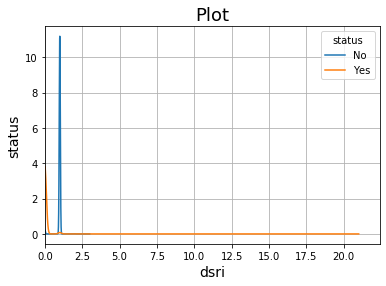

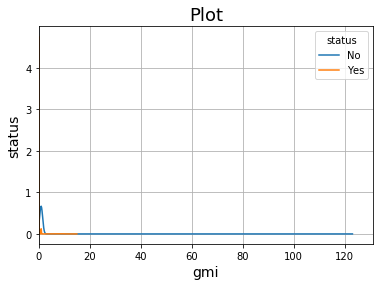

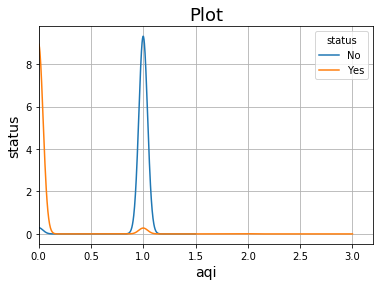

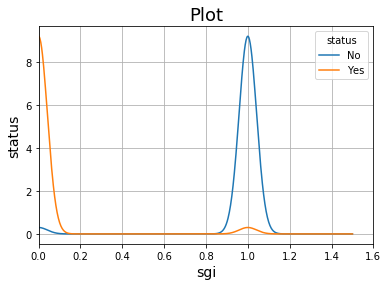

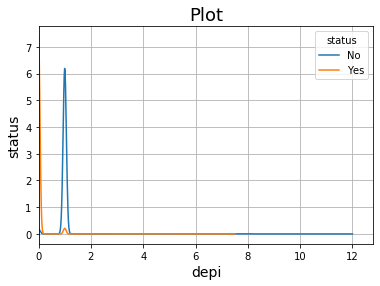

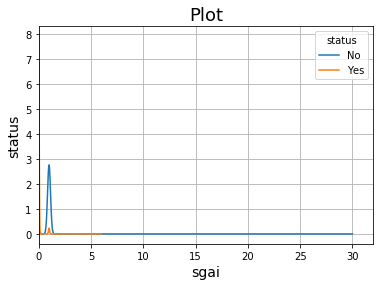

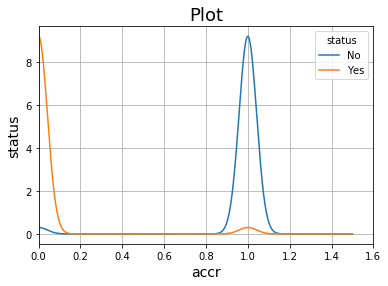

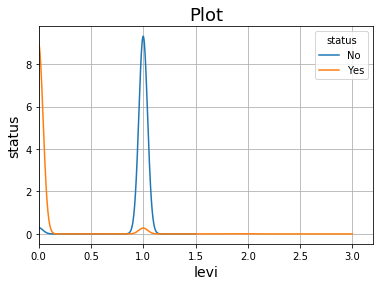

In [17]:
numerical_features_set = ['dsri', 'gmi', 'aqi', 'sgi', 'depi', 'sgai', 'accr', 'levi']
categorical_features_set = ['status']

for c in categorical_features_set:
    for n in numerical_features_set:
        hist_plot(filter_df[n], filter_df[c], n,c)

## Model Building: 

### Dummy Variable coding

Remove the response variable from the dataset¶


In [18]:
X_features = list(filter_df.columns)
X_features.remove('status')

In [19]:
X_features

['dsri', 'gmi', 'aqi', 'sgi', 'depi', 'sgai', 'accr', 'levi']

In [20]:
categorical_features = ['status']

In [21]:
encoded_X_df = pd.get_dummies( filter_df[X_features], drop_first = False )
encoded_Y_df = pd.get_dummies( filter_df['status'], drop_first=False)

In [22]:
#?pd.get_dummies
encoded_Y_df.head()

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [23]:
pd.options.display.max_columns = None
encoded_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1238
Data columns (total 8 columns):
dsri    1239 non-null float64
gmi     1239 non-null float64
aqi     1239 non-null float64
sgi     1239 non-null float64
depi    1239 non-null float64
sgai    1239 non-null float64
accr    1239 non-null float64
levi    1239 non-null float64
dtypes: float64(8)
memory usage: 87.1 KB


In [24]:
Y = encoded_Y_df.filter(['Yes'], axis =1)
X = encoded_X_df

### Train and test data split using Python

The train and test split can also be done using the **sklearn module**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [26]:
y_test.Yes.value_counts()

y_train.Yes.value_counts()

0    365
1      7
Name: Yes, dtype: int64

0    835
1     32
Name: Yes, dtype: int64

## Model Building: Using the **sklearn** 



In [27]:
from sklearn import ensemble #linear_model, ensemble, neural_network, naive bayes, svm, tree
#dir(ensemble)

In [28]:
#?ensemble.GradientBoostingClassifier

In [29]:
"""
The “balanced” mode uses the values of y to automatically adjust weights 
inversely proportional to class frequencies in the input data as 
n_samples / (n_classes * np.bincount(y))
"""

rf_model = ensemble.RandomForestClassifier(bootstrap=True, 
                                           criterion='gini',
                                           max_depth=4, 
                                           max_features='auto',
                                           min_impurity_decrease=0.001,
                                           min_samples_leaf=30, 
                                           min_samples_split=50,
                                           class_weight="balanced_subsample", #to remove class imbalance (balanced)
                                           n_estimators=500,
                                           oob_score=True, 
                                           random_state=42, 
                                           verbose=0,
                                           warm_start=False)

rf_model.fit(X_train,y_train.values.ravel())
#rf_model.fit(os_data_X,os_data_y)

'\nThe “balanced” mode uses the values of y to automatically adjust weights \ninversely proportional to class frequencies in the input data as \nn_samples / (n_classes * np.bincount(y))\n'

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

The problem with above approach is to understand which combination is the best. Should we have made a tree with `max_depth` as 4 and `min_sample_leaf` as 30 or should there have been other combination. Searching the grid for the best combination can be taken care of by `RandomizedSearchCV` method of `model_selection`

### Model with Random Search
Refer here to understand the details of parallel processing: https://stackoverflow.com/questions/32673579/scikit-learn-general-question-about-parallel-computing

#### Create search space

To use RandomizedSearchCV, create a parameter grid from where sample will be picked during model building:

In [30]:
# Number of trees in random forest
n_estimators = [100,120,150,200, 240, 400, 500]

# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7,8,9]
max_depth.append(None)

# Number of features to consider at every split
max_features = ['auto', 'log2']

# Minimum number of samples required to split a node
min_samples_split = [50, 75, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30, 35, 40]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# How to remove the class imbalance
class_weight=['balanced_subsample','balanced']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}
random_grid

{'n_estimators': [100, 120, 150, 200, 240, 400, 500],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, None],
 'max_features': ['auto', 'log2'],
 'min_samples_split': [50, 75, 100],
 'min_samples_leaf': [30, 35, 40],
 'bootstrap': [True, False],
 'class_weight': ['balanced_subsample', 'balanced']}

To report the performance on the selected KPI use `sklearn.metrics.SCORERS.keys()` to get the list of all the metrics and pass the relevant one in `RandomizedSearchCV` or `GridSearchCV`

In [31]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

Import RandomizedSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV?

In [33]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

rf_model = ensemble.RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
rf_best_model = RandomizedSearchCV(estimator = rf_model, 
                               param_distributions = random_grid, scoring = "precision",
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -2, pre_dispatch =2)
# Fit the random search model
rf_best_model
rf_best_model.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   35.9s finished
/Users/Rahul/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

### Report the parameter

The best model has the following parameter selected from the random search grid

In [34]:
rf_best_model.best_params_

rf_best_model.best_estimator_

rf_best_model.best_score_

#rf__best_model.best_index_

{'n_estimators': 200,
 'min_samples_split': 50,
 'min_samples_leaf': 30,
 'max_features': 'auto',
 'max_depth': 8,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

0.22969187675070027

### Model with Grid Search

Random search allows to narrow down the range for each hyperparameter. Thus we know where to concentrate the search, to fine tune the model further. 

`GridSearchCV`, is a method that instead of sampling randomly from a distribution, evaluates all combinations which are defined. The grid search can be called `from sklearn.model_selection import GridSearchCV`

You are encouraged to fine tune the model further using Grid Search

## Model Evaluation

### 1. The prediction on train data.

To predict the outcome on the **train set**
> * Use **predict** function of the model object 


In [35]:
predict_class_train_df = pd.DataFrame(rf_best_model.predict(X_train))
predict_class_train_df.head()

predict_porb_train_df = pd.DataFrame(rf_best_model.predict_proba(X_train))
predict_porb_train_df.iloc[:,:].head()

,0
0,0
1,0
2,0
3,0
4,0


,0,1
0,0.514342,0.485658
1,0.913632,0.086368
2,0.603899,0.396101
3,0.804298,0.195702
4,0.724533,0.275467


The above output clearly shows that the predcited class is the one for which the calculated probability is more compared to the calculated probability of the other class.

### 2. The prediction on test data.

The prediction can be carried out by **defining functions** as well. Below is one such instance wherein a function is defined and is used for prediction

In [36]:
def get_predictions ( test_class, model, test_data ):
    predicted_df = pd.DataFrame(model.predict_proba(test_data))
    y_pred_df = pd.concat([test_class.reset_index(drop=True), predicted_df.iloc[:,1:]], axis =1)
    return y_pred_df

Giving label to the Y column of the test set by using the dictionary data type in python. This is being done for the model which was built using dummy variable coding. It will be used to generate confusion matrix at a later time

In [37]:
y_test.Yes.value_counts()

0    365
1      7
Name: Yes, dtype: int64

In [38]:
test_series = y_test
train_series = y_train

status_dict = {1:"Yes", 0:"No"}

y_test_df = test_series.replace(dict(Yes=status_dict))
y_test_df.rename({'Yes': 'status'}, axis='columns', inplace=True )

y_train_df = train_series.replace(dict(Yes=status_dict))

y_train_df.rename({'Yes': 'status'}, axis='columns', inplace=True )


In [39]:
y_test_df.status.value_counts()

No     365
Yes      7
Name: status, dtype: int64

In [40]:
predict_test_df = pd.DataFrame(get_predictions(y_test_df.status, rf_best_model, X_test))
predict_test_df.rename(columns = {1:'predicted_prob'}, inplace=True)
predict_test_df.head()

,status,predicted_prob
0,No,0.420246
1,No,0.076516
2,No,0.046352
3,No,0.036160
4,No,0.178406


In [41]:
predict_test_df['predicted'] = predict_test_df.predicted_prob.map(lambda x: 'Yes' if x > 0.5 else 'No')
predict_test_df[0:10]

,status,predicted_prob,predicted
0,No,0.420246,No
1,No,0.076516,No
2,No,0.046352,No
3,No,0.036160,No
4,No,0.178406,No
5,No,0.304414,No
6,No,0.679438,Yes
7,No,0.252460,No
8,No,0.588914,Yes
9,No,0.311524,No


### 3. Confusion Matrix

We will built classification matrix using the **metrics** method from **sklearn** package. We will also write a custom function to build a classification matrix and use it for reporting the performance measures.

To understand the concept of micro average and macro average:

https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

#### 3a. Confusion Matrix using sklearn

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
print("The model with dummy variable coding output: ")
confusion_matrix(predict_test_df.status, predict_test_df.predicted)
rf_report = (classification_report(predict_test_df.status, predict_test_df.predicted))
print(rf_report)


The model with dummy variable coding output: 


array([[342,  23],
       [  3,   4]])

              precision    recall  f1-score   support

          No       0.99      0.94      0.96       365
         Yes       0.15      0.57      0.24         7

    accuracy                           0.93       372
   macro avg       0.57      0.75      0.60       372
weighted avg       0.98      0.93      0.95       372



#### 3b Confusion Matrix using generic function

In [44]:
def draw_cm( actual, predicted ):
    plt.figure(figsize=(9,9))
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["No", "Yes"] , 
               yticklabels = ["No", "Yes"],cmap = 'Blues_r')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Classification Matrix Plot', size = 15);
    plt.show()

The classification matrix plot as reported with dummy variable coding is:

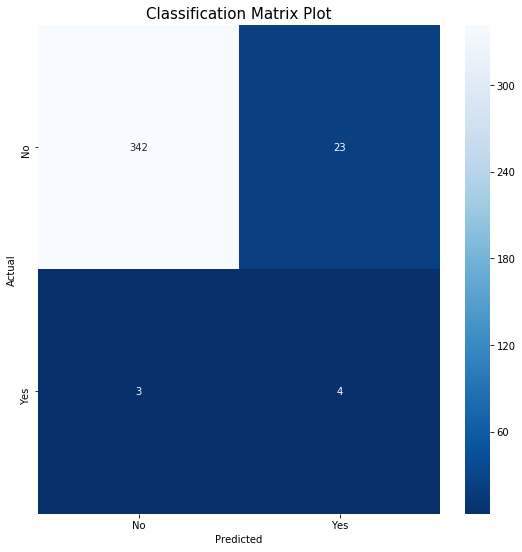

In [45]:
draw_cm( predict_test_df.status, predict_test_df.predicted )

### 4. Performance Measure on the test set


In [46]:
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'specificity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'sensitivity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'precision': [round(clasf_matrix[1,1]/(clasf_matrix[0,1]+clasf_matrix[1,1]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

In [47]:
cm = metrics.confusion_matrix(predict_test_df.status, predict_test_df.predicted)

lg_reg_metrics_df = pd.DataFrame(measure_performance(cm))
lg_reg_metrics_df

print( 'Total Accuracy sklearn: ',np.round( metrics.accuracy_score( predict_test_df.status, predict_test_df.predicted ), 2 ))



,specificity,sensitivity,recall,precision,overall_acc
0,0.94,0.57,0.57,0.15,0.93


Total Accuracy sklearn:  0.93



#### End of Document

***
***
